In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

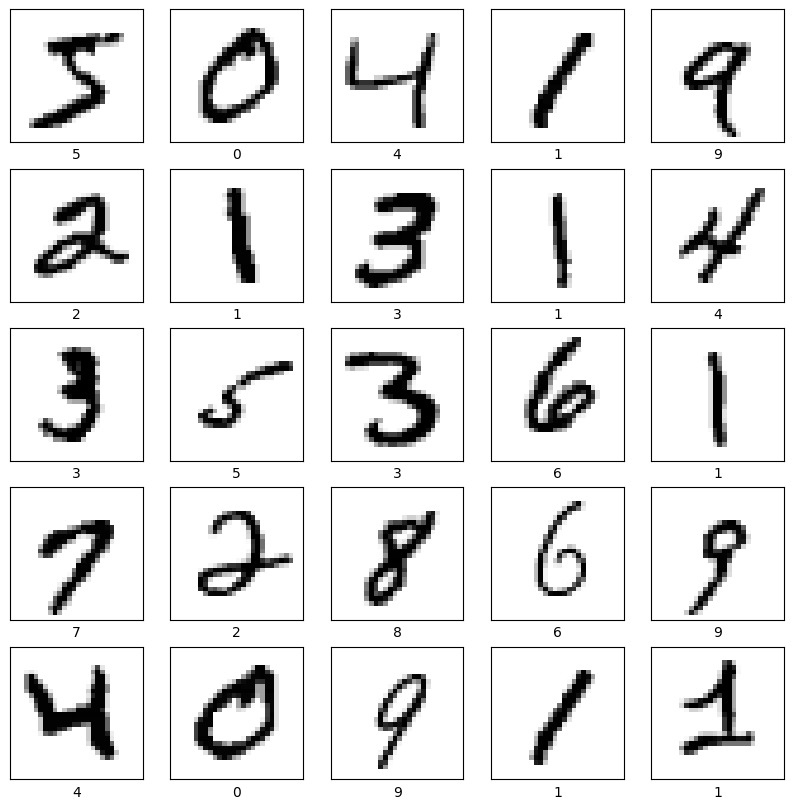

In [5]:
import matplotlib.pyplot as plt

# Display a few sample images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)  # Display the ith image
    plt.xlabel(y_train[i])  # Display the label
plt.show()


In [6]:
print(x_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

#### scaling the data between 0 to 1 by divideing each pixels by 255

In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [8]:
print(x_train[1])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

lets create a 5 layers 

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.initializers import GlorotUniform, HeNormal, RandomNormal, RandomUniform
from tensorflow.keras.activations import relu, elu, selu, softmax




# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Input layer

    Dense(128, activation=relu, kernel_initializer=GlorotUniform()),  # Layer 1
    Dense(64, activation=elu, kernel_initializer=HeNormal()),  # Layer 2
    Dense(32, activation=selu, kernel_initializer=RandomNormal()),  # Layer 3
    Dense(16, activation=relu, kernel_initializer=RandomUniform()),  # Layer 4
    Dense(8, activation=elu, kernel_initializer=GlorotUniform()),  # Layer 5
    Dense(4, activation=selu, kernel_initializer=HeNormal()),  # Layer 6
    Dense(2, activation=relu, kernel_initializer=RandomNormal()),  # Layer 7
    Dense(4, activation=elu, kernel_initializer=RandomUniform()),  # Layer 8
    Dense(8, activation=selu, kernel_initializer=GlorotUniform()),  # Layer 9
    Dense(10, activation=softmax, kernel_initializer=HeNormal())  # Output layer
])

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test))


1875/1875 [==============================] - 8s 3ms/step - loss: 1.2559 - accuracy: 0.5090 - val_loss: 0.7097 - val_accuracy: 0.7324


In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.7097 - accuracy: 0.7324
Test accuracy: 0.7324000000953674


In [15]:
predictions = model.predict(x_test[:5])
print('Predictions:', predictions.argmax(axis=1))
print('Actual Labels:', y_test[:5])


1/1 [==============================] - 0s 163ms/step
Predictions: [7 2 1 0 4]
Actual Labels: [7 2 1 0 4]


In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2600 - accuracy: 0.9258 - val_loss: 0.1387 - val_accuracy: 0.9587
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1148 - accuracy: 0.9658 - val_loss: 0.1007 - val_accuracy: 0.9696
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0791 - accuracy: 0.9762 - val_loss: 0.0902 - val_accuracy: 0.9712
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0595 - accuracy: 0.9820 - val_loss: 0.0727 - val_accuracy: 0.9764
Epoch 5/5
313/313 [==============================] - 1s 1ms/step


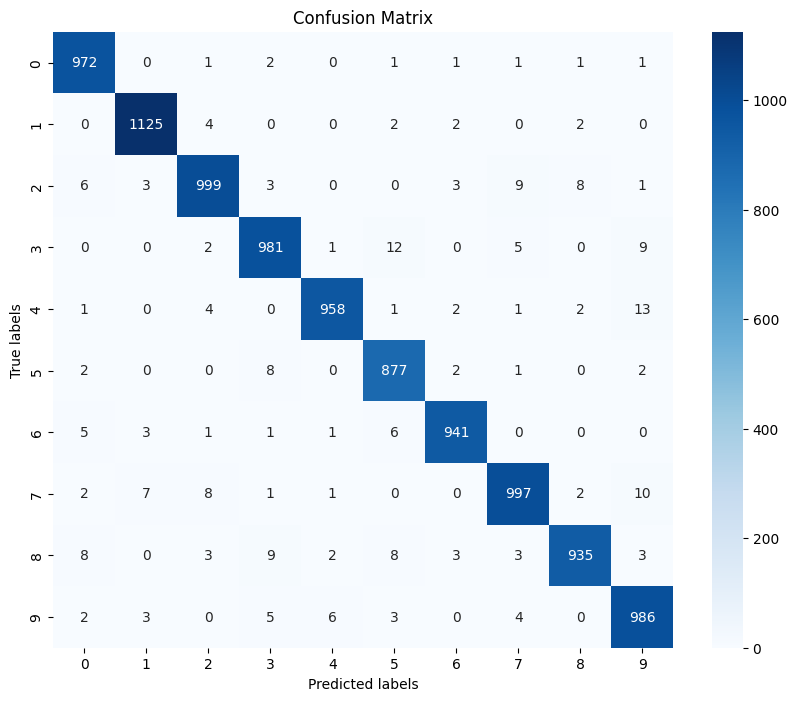

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  
    Dense(128, activation='relu'),  
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Predict labels for the test set
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

